<a href="https://colab.research.google.com/github/Tahahaha7/Quantitative_Trading/blob/main/Factor_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\text{Capital Asset Pricing Model (CAPM)}$


A quantitative trader has just learnt about the CAPM model. He has been thinking about dabbling in passive investing to avoid the burden of transaction costs, so he is looking for stocks to hold long term. He decides that he will pick stocks with the highest beta parameters relative to the S&P 500 benchmark, and hold them long term. He thinks that since the S&P 500 generally moves upward in value, a high beta value for each stock in his portfolio will mean that his portfolio will generate returns higher than those from the S&P 500. In this pre-class work, your job is to determine if this is a good investment idea (see the task on the next page).  


**TASK:** Select 12 stocks from the stock universe. Calculate their beta values relative to the S&P 500 for a time range of 4 years using the daily return data (that is, using 4 years of market data). Select the 3 stocks with the highest beta values based on the 4 years of data, and see how they behave relative to the S&P 500 benchmark for the next two years.  Next, select the 3 stocks with the lowest beta values relative to the S&P 500 benchmark and see how they perform relative to the benchmark for the next two years.

The CAPM Formula:
$$R_a=R_{rf}+\beta \cdot (R_m-R_{rf})$$
$$\beta=\frac{Cov(R_a, R_m)}{Var(R_m)}$$
$R_a \rightarrow$ Expected return on a security

$R_{rf} \rightarrow$ Risk-free rate

$R_m \rightarrow$ Expected return of the market

$\beta \rightarrow$ Linear relationship between any stock expected return and market premium

In [2]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Extract 4 years of daily Adjusted Closing for 12 stocks and S&P500 

columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']
stocks = ['^GSPC', 'AAL', 'UAL', 'GOOG', 'AAPL', 'FB', 'TM',
          'HMC', 'FORD', 'SNE', 'CMG', 'DIS', 'TWTR']

stock_data = pd.DataFrame()

for i in stocks:
    stock = pdr.get_data_yahoo(str(i),'2014-01-01','2018-01-01')
    stock_data[str(i)] = pd.DataFrame(stock.to_records())['Adj Close'].values

In [4]:
stock_data.head()

,^GSPC,AAL,UAL,GOOG,AAPL,FB,TM,HMC,FORD,SNE,CMG,DIS,TWTR
0,1831.979980,23.907927,37.730000,554.481689,17.598297,54.709999,110.172958,40.689999,1.65,17.160000,523.429993,70.192497,67.500000
1,1831.369995,25.020357,39.950001,550.436829,17.211735,54.560001,110.063362,40.689999,1.60,17.180000,531.309998,70.045273,69.000000
2,1826.770020,25.482304,39.360001,556.573853,17.305593,57.200001,109.752831,40.799999,1.60,17.299999,527.320007,69.778374,66.290001
3,1837.880005,25.369177,38.689999,567.303589,17.181829,57.919998,110.017693,40.709999,1.57,17.320000,533.059998,70.256927,61.459999
4,1837.489990,26.047951,41.020000,568.484192,17.290642,58.230000,109.460571,40.650002,1.62,18.250000,535.849976,69.226189,59.290001


In [5]:
# Calculating the return of the stocks using the natural logarithm 
return_stock_data = np.log(stock_data/stock_data.shift(1))
return_stock_data = return_stock_data.dropna()
return_stock_data.head()

,^GSPC,AAL,UAL,GOOG,AAPL,FB,TM,HMC,FORD,SNE,CMG,DIS,TWTR
1,-0.000333,0.045480,0.057173,-0.007322,-0.022211,-0.002745,-0.000995,0.000000,-0.030772,0.001165,0.014942,-0.002100,0.021979
2,-0.002515,0.018294,-0.014879,0.011088,0.005438,0.047253,-0.002825,0.002700,0.000000,0.006961,-0.007538,-0.003818,-0.040067
3,0.006063,-0.004449,-0.017169,0.019095,-0.007177,0.012509,0.002410,-0.002208,-0.018928,0.001155,0.010826,0.006835,-0.075653
4,-0.000212,0.026404,0.058479,0.002079,0.006313,0.005338,-0.005077,-0.001475,0.031350,0.052303,0.005220,-0.014780,-0.035946
5,0.000348,0.062772,0.065574,-0.009677,-0.012852,-0.017497,0.003997,0.001966,0.030397,-0.009359,0.009621,-0.004263,-0.038513


In [6]:
def calculating_beta(stock):
    cov_mat = np.cov(return_stock_data[stock], return_stock_data['^GSPC'])
    return cov_mat[0, 1]/cov_mat[1, 1]

results = pd.DataFrame([calculating_beta(i) for i in stocks[1:]], index=stocks[1:], columns=['beta']).sort_values(by='beta')
results

,beta
FORD,0.122988
CMG,0.654822
DIS,0.926496
TM,0.943300
HMC,0.974228
AAPL,1.054036
TWTR,1.069782
GOOG,1.100508
SNE,1.215930
FB,1.242333


In [7]:
new_stock_data = pd.DataFrame()

for i in stocks:
    stock = pdr.get_data_yahoo(str(i),'2018-01-01','2020-01-01')
    new_stock_data[str(i)] = pd.DataFrame(stock.to_records())['Adj Close'].values

In [8]:
return_new_stock_data = np.log(new_stock_data/new_stock_data.shift(1))
return_new_stock_data = return_new_stock_data.dropna()
return_new_stock_data.head()

,^GSPC,AAL,UAL,GOOG,AAPL,FB,TM,HMC,FORD,SNE,CMG,DIS,TWTR
1,0.006378,-0.012342,-0.006549,0.016280,-0.000174,0.017756,0.013617,0.008951,-0.008032,0.011076,0.053339,0.004284,-0.002451
2,0.004021,0.006285,0.011180,0.003615,0.004634,-0.001843,0.015479,0.019075,0.008032,0.020311,-0.006135,-0.000445,-0.018993
3,0.007009,-0.000380,0.001443,0.014466,0.011321,0.013579,0.012781,0.004502,-0.024293,0.030226,0.021518,-0.005450,0.013662
4,0.001661,-0.009926,-0.012331,0.004264,-0.003721,0.007624,0.006775,0.005041,0.016261,0.006141,0.014804,-0.014438,0.011041
5,0.001302,-0.000960,-0.000438,-0.000614,-0.000115,-0.002180,-0.007822,-0.007852,-0.016261,0.011162,0.002822,-0.000727,-0.017228


## $\text{Stocks with lowest Beta}$

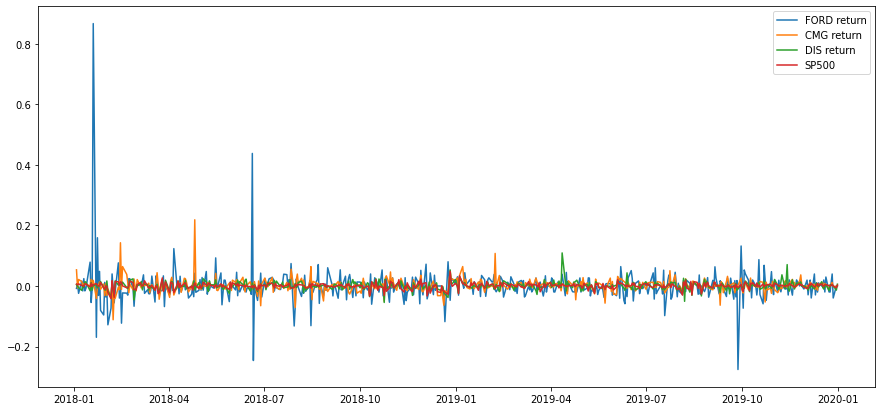

In [9]:
low_beta = results.index[:3]

plt.figure(figsize=(15, 7))
for i in low_beta:
    plt.plot(stock.index[1:], return_new_stock_data[i], label=i+' return')
plt.plot(stock.index[1:], return_new_stock_data['^GSPC'], label='SP500')
plt.legend();

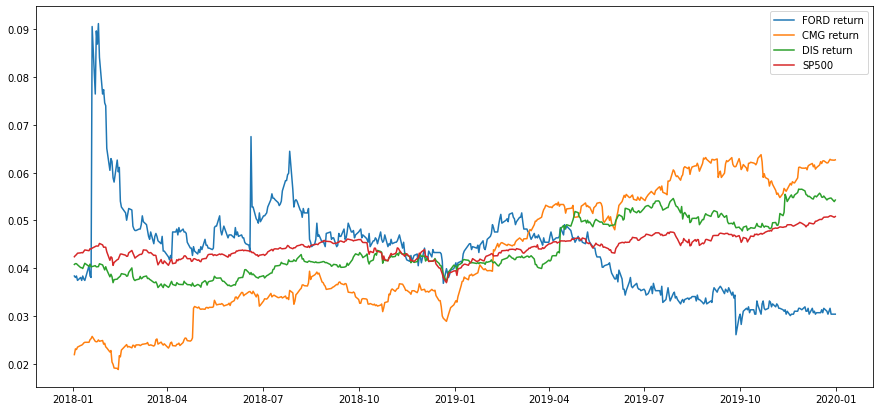

In [10]:
plt.figure(figsize=(15, 7))
for i in low_beta:
    plt.plot(stock.index, normalize(new_stock_data[i][:,np.newaxis], axis=0).ravel(), label=i+' return')
plt.plot(stock.index,normalize(new_stock_data['^GSPC'][:,np.newaxis], axis=0).ravel(), label='SP500')
plt.legend();

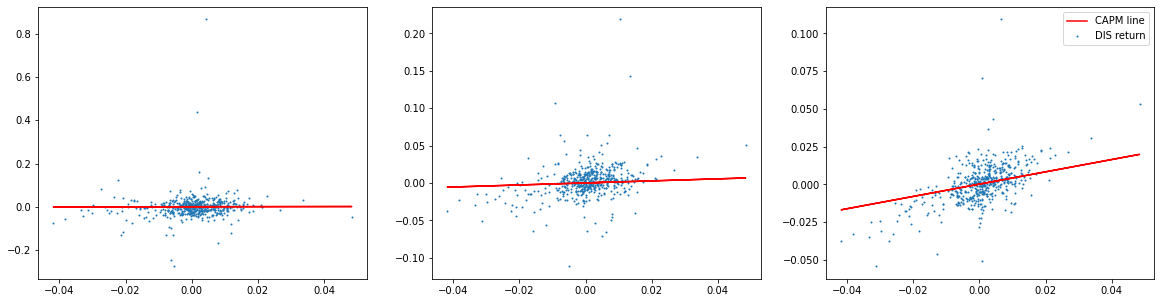

In [14]:
# Correlation of the best beta stocks with SP500
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot

plt.figure(figsize=(20, 5))
for idx, i in enumerate(low_beta): 
    plt.subplot(1, 3, idx+1)
    #plt.ylim(-.1, .1); plt.xlim(-.1, .1)
    plt.scatter(return_new_stock_data['^GSPC'], return_new_stock_data[i], s=1, label=i+' return')
    beta, alpha = np.polyfit(return_new_stock_data[i], return_new_stock_data['^GSPC'], deg=1)
    plt.plot(return_new_stock_data['^GSPC'], beta*return_new_stock_data['^GSPC'] + alpha, color='red', label='CAPM line')

plt.legend();

## $\text{Stocks with highest Beta}$

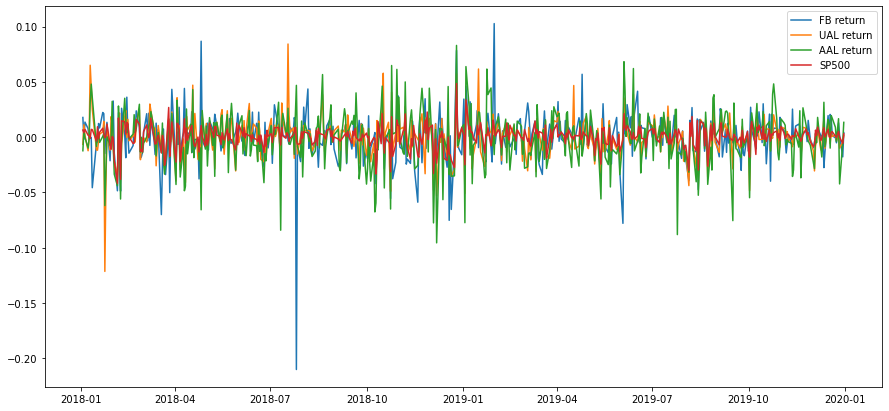

In [16]:
high_beta = results.index[-3:]

plt.figure(figsize=(15, 7))
for i in high_beta:
    plt.plot(stock.index[1:], return_new_stock_data[i], label=i+' return')
plt.plot(stock.index[1:], return_new_stock_data['^GSPC'], label='SP500')
plt.legend();

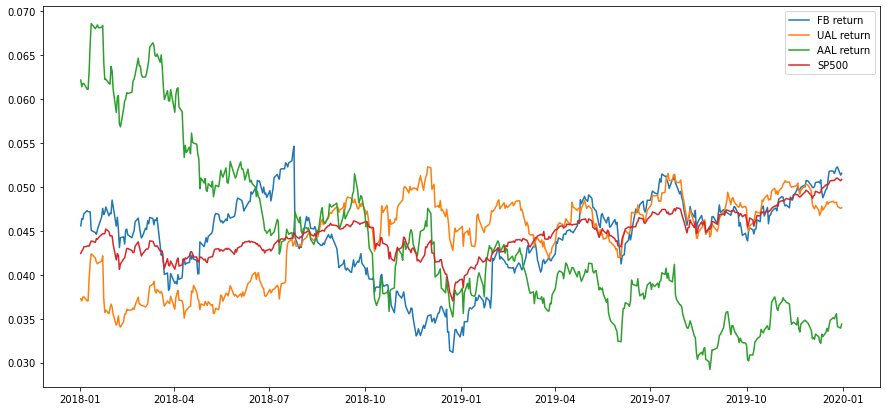

In [17]:
high_beta = results.index[-3:]

plt.figure(figsize=(15, 7))
for i in high_beta:
    plt.plot(stock.index, normalize(new_stock_data[i][:,np.newaxis], axis=0).ravel(), label=i+' return')
plt.plot(stock.index,normalize(new_stock_data['^GSPC'][:,np.newaxis], axis=0).ravel(), label='SP500')
plt.legend();

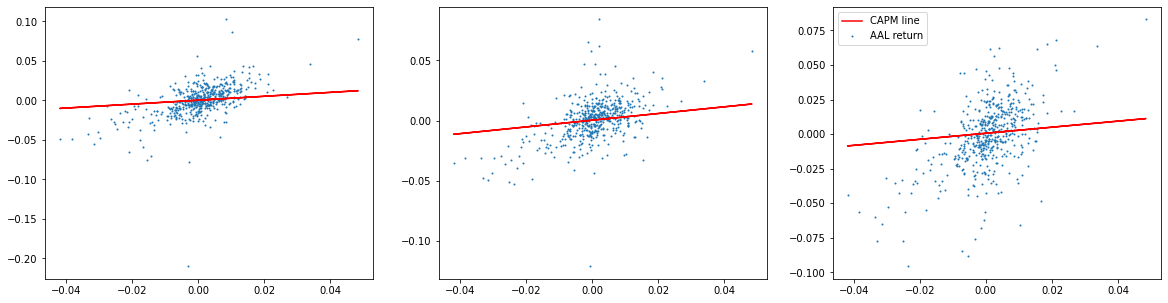

In [18]:
# Correlation of the best beta stocks with SP500
plt.figure(figsize=(20, 5))
for idx, i in enumerate(high_beta):
    plt.subplot(1, 3, idx+1)
    plt.scatter(return_new_stock_data['^GSPC'], return_new_stock_data[i], s=1, label=i+' return')
    beta, alpha = np.polyfit(return_new_stock_data[i], return_new_stock_data['^GSPC'], deg=1)
    plt.plot(return_new_stock_data['^GSPC'], beta*return_new_stock_data['^GSPC'] + alpha, color='red', label='CAPM line')
    #plt.ylim(-.08, .08); plt.xlim(-.08, .08)
plt.legend();

- Do the high beta stocks perform better than the low beta stocks? 

The stocks with high beta exceed 1 so they're more volatile compared to the SP500 benchmark. The graph above shows low correlation with the index during the 2 years.


- Will this strategy of investing in high beta stocks relative to the S&P 500 yield better returns for our quantitative trader than if he simply invested in the S&P 500 in the two-year window?

Intuitively, the stocks with high volatility would offer either high profit or high loses compared to the SP500, so the strategy's performance depends on the time window. SP500 stock is more profitable if we invested long term but for stocks with high beta, it's better to actively trade to minimize/maximize loses/wins.

- Comment on if you expect the estimated beta to remain constant over the two year window.

Absolutely not, there are many instances where a stock would experience high volatility in the two years even if it had a low beta in the previous four years.